# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500    U0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250    U0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500    U0        S

#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [7]:
#numerical vars

titanic.select_dtypes(exclude = 'object').head()


PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1       0.0       3  22.0      1      0   7.2500
1            2       1.0       1  38.0      1      0  71.2833
2            3       1.0       3  26.0      0      0   7.9250
3            4       1.0       1  35.0      1      0  53.1000
4            5       0.0       3  35.0      0      0   8.0500

In [9]:
#categorical vars
titanic.select_dtypes(include = 'object').head()

Name  Gender  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171    U0        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282    U0        S  
3            113803  C123        S  
4            373450    U0        S

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [13]:
plt.style.use('classic');

plt.figure(figsize=(12,6));

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

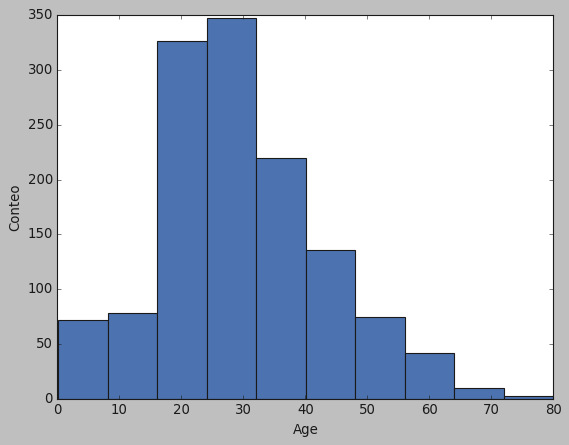

In [17]:
plt.hist(titanic['Age'])
plt.xlabel('Age')
plt.ylabel('Conteo');

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

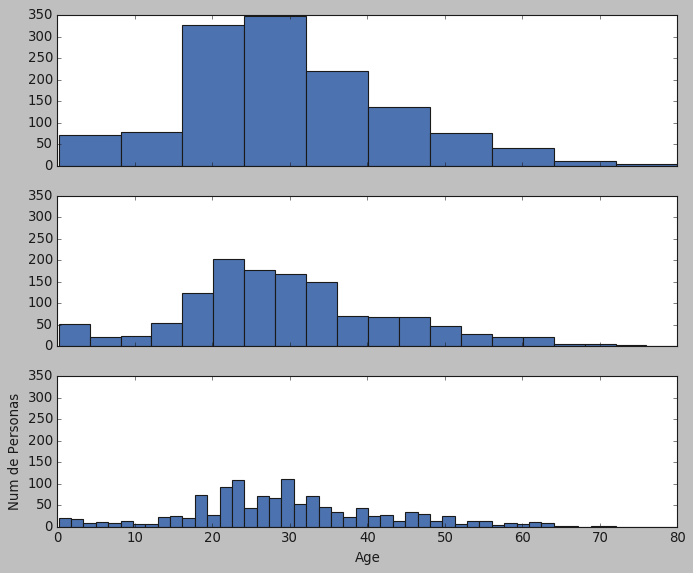

In [42]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,8), sharex=True, sharey=True)

ax1.hist(titanic['Age'], bins = 10)

ax2.hist(titanic['Age'], bins = 20)

ax3.hist(titanic['Age'], bins = 50);

plt.xlabel('Age')
plt.ylabel('Num de Personas');

#### Whether the bin size affects your plot? Why?

### Si, por que a medida que el numero de bines incrementa parece la grafica mas dispersa.

#### Use seaborn to show the distribution of the column `Age`

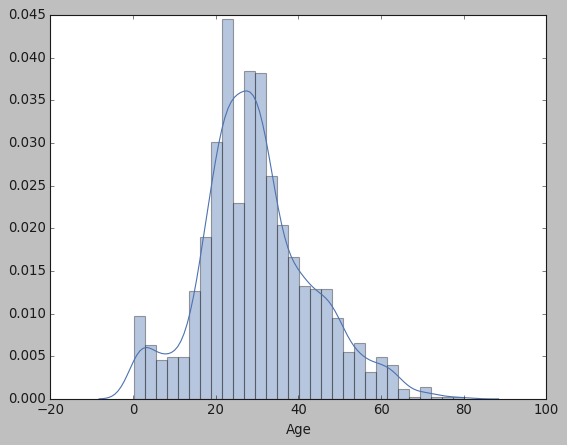

In [45]:
sns.distplot(titanic['Age']);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

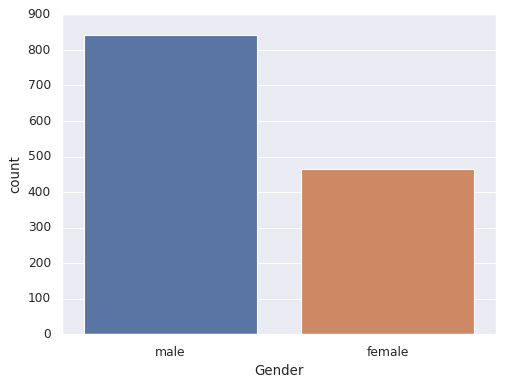

In [51]:
sns.countplot(x='Gender', data=titanic)
sns.set(rc={'figure.figsize':(5,5)});

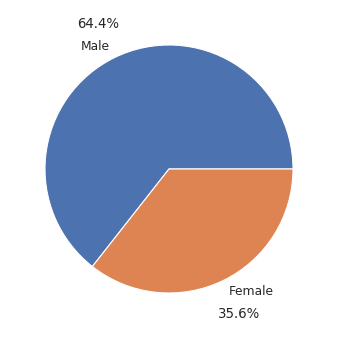

In [68]:
plt.pie(x = titanic['Gender'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', pctdistance = 1.3);

#### Use the appropriate plot to visualize the column `Pclass` 


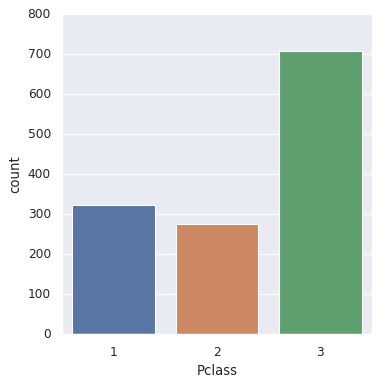

In [69]:
sns.countplot(x='Pclass', data=titanic)
sns.set(rc={'figure.figsize':(5,5)});

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

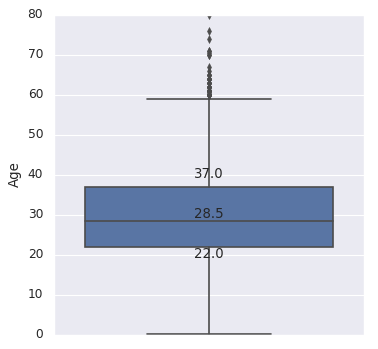

In [135]:
box = sns.boxplot(x='Age', data=titanic, orient = 'v')
box.text(0, 40, titanic['Age'].quantile(0.75), horizontalalignment='center', verticalalignment='center')
box.text(0, 30, titanic['Age'].median(), horizontalalignment='center', verticalalignment='center')
box.text(0, 20, titanic['Age'].quantile(0.25), horizontalalignment='center', verticalalignment='center');


#### What does the previous plot tell you about the feature `Age`? Comment.

#### Muestra que la edad media es de 28.5, los outliers son las edades de mas de igual o mayor de 60; y que el IQR (Inter Quartile Range) se compone entre las edades de 22.0 (25th quartil) y 37.0 (75th quartil), en otras palabras, la mitad de los datos se encuentra en esos rangos de edades


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

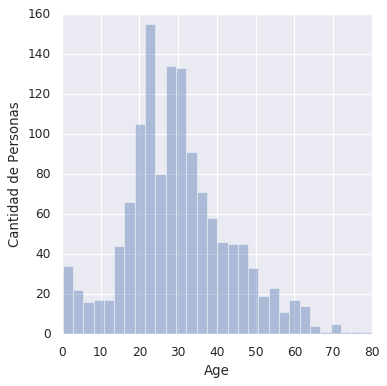

In [119]:
#esta pregunta ya estaba arriba tal cual
sns.distplot(titanic['Age'], kde = False)
plt.ylabel('Cantidad de Personas');

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

#### Nos dice que la edad mas frecuente es aproximadamente de 24 seguida de una baja de frecuencia entre los 25 y 26/27 y que hay mas bebes (0-5) que ninos (6-13)

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

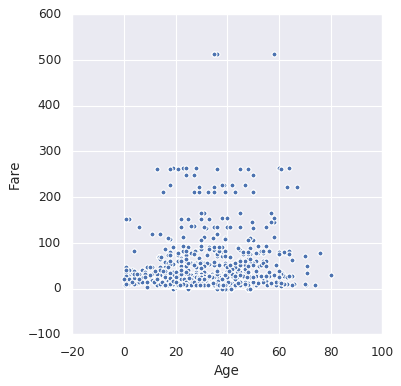

In [129]:
plt.scatter(x = titanic['Age'], y = titanic['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare');

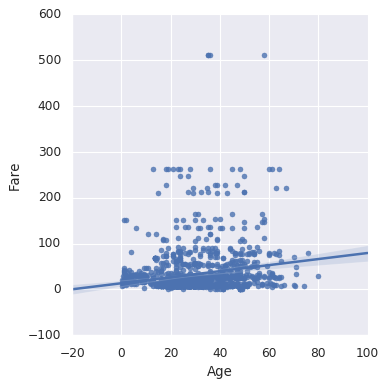

In [126]:
sns.lmplot('Age', 'Fare', data=titanic, fit_reg=True);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

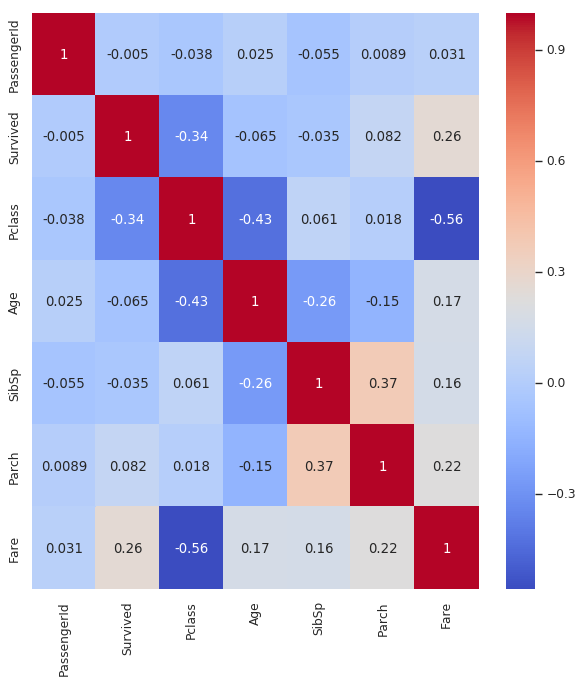

In [141]:
sns.heatmap(titanic.corr(), cmap='coolwarm', annot=True);
sns.set(rc={'figure.figsize':(9,9)});

#### According to the previous plot, what are the most correlated feature? Comment.

### Las variables mas correlacionadas positivamente son SibSP - Parch con 0.37, seguido de Fare-Survided con 0.26 (Esto pudiera indicar que hay una relacion entre ivirel costo del boleto y las posibilidades de sobrevivir)

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

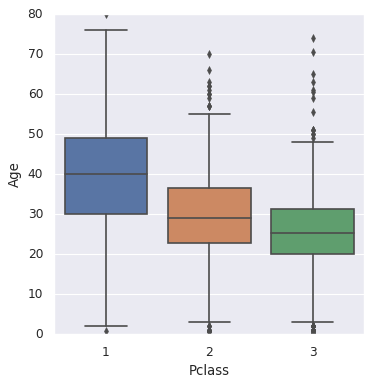

In [150]:
sns.boxplot(x='Pclass', y='Age', data=titanic)
sns.set(rc={'figure.figsize':(5,5)});

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

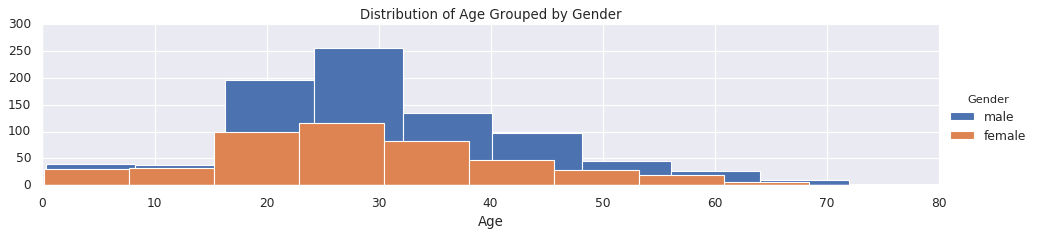

In [186]:
fig = sns.FacetGrid(titanic, hue='Gender', aspect=)
fig.map(plt.hist, 'Age')
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend();